# Mutilayer Perceptron for classification using pytorch
A Multi-Layer Perceptron (MLP) is a class of feedforward artificial neural networks (ANN) that consists of multiple layers of neurons. It is one of the most basic and foundational architectures in deep learning and can be used for both regression and classification tasks. MLPs are fully connected, meaning every neuron in one layer is connected to every neuron in the next layer.

In [ ]:
# Import libraies
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating a classification dataset
X,y =make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

# Convert to Pytorch tensors
X_train=torch.tensor(X_train, dtype=torch.float32)
X_test=torch.tensor(X_test, dtype=torch.float32)
y_train=torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test=torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [ ]:
X_train[:2], y_train[:2]

(tensor([[ 0.5036, -1.5137, -0.4691,  1.9018, -0.8706,  1.8200,  1.6629,  1.2911,
          -0.1671, -1.0472,  1.4300,  0.2010,  1.2758, -1.1326,  1.7501, -1.4089,
           0.0330, -0.8034, -1.3141,  1.4121],
         [-0.6977,  0.3452, -1.7982,  1.2280, -0.5181, -0.1456, -2.2236,  1.2434,
          -0.3865, -0.5998, -0.3010, -0.6314, -1.7939, -0.3348, -0.6873, -0.5667,
          -0.6535, -0.6571,  0.2114, -1.3816]]),
 tensor([[1.],
         [0.]]))

In [ ]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

(torch.Size([800, 20]),
 torch.Size([800, 1]),
 torch.Size([200, 20]),
 torch.Size([200, 1]))

In [ ]:
# Define a Multilayer perceptron
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1=nn.Linear(20,64)
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,1)
        self.relu=nn.ReLU()
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.sigmoid(self.fc3(x))
        return x

In [ ]:
# Insantiate the model, define loss and optimizer
model=MLP()
criterion=nn.BCELoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import torch
if torch.cuda.is_available():
  print(torch.cuda.get_device_name(0))

Tesla T4


Epoch 1, Train Loss: 0.6906452178955078, Test Loss: 0.6832184791564941
Epoch 2, Train Loss: 0.6843026876449585, Test Loss: 0.6784898638725281
Epoch 3, Train Loss: 0.6780584454536438, Test Loss: 0.6737760901451111
Epoch 4, Train Loss: 0.6718761920928955, Test Loss: 0.6690570712089539
Epoch 5, Train Loss: 0.6657361388206482, Test Loss: 0.6642788052558899
Epoch 6, Train Loss: 0.6596026420593262, Test Loss: 0.6594280004501343
Epoch 7, Train Loss: 0.6534448862075806, Test Loss: 0.6545107960700989
Epoch 8, Train Loss: 0.6472330689430237, Test Loss: 0.6495189070701599
Epoch 9, Train Loss: 0.6409255266189575, Test Loss: 0.6444010734558105
Epoch 10, Train Loss: 0.6344920992851257, Test Loss: 0.6391100883483887
Epoch 11, Train Loss: 0.6279004812240601, Test Loss: 0.6336225271224976
Epoch 12, Train Loss: 0.6211441159248352, Test Loss: 0.6279352307319641
Epoch 13, Train Loss: 0.6141846179962158, Test Loss: 0.6220146417617798
Epoch 14, Train Loss: 0.6070128083229065, Test Loss: 0.6158576011657715
E

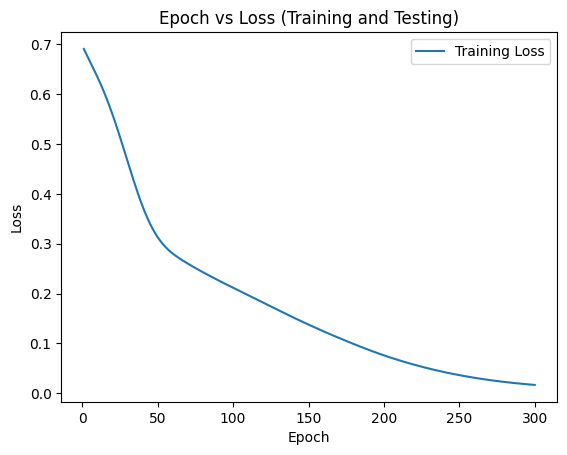

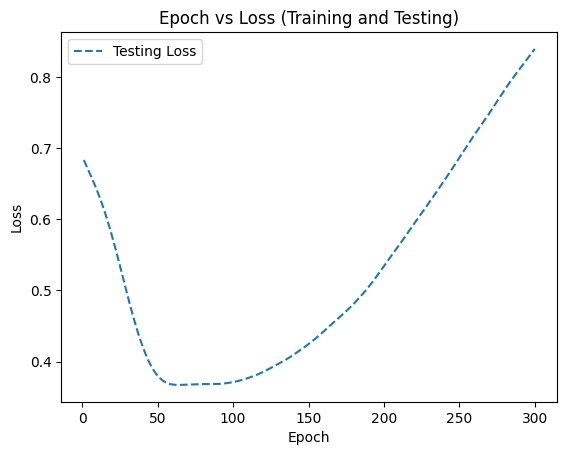

In [ ]:
import matplotlib.pyplot as plt

# Lists to store training and testing loss values
train_loss_values = []
test_loss_values = []

# Training loop
for epoch in range(300):
    # Set model to training mode
    model.train()

    # Forward pass on training data
    y_train_pred = model(X_train)

    # Compute training loss
    train_loss = criterion(y_train_pred, y_train)

    # Backward pass and optimize
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Store the training loss
    train_loss_values.append(train_loss.item())

    # Set model to evaluation mode for testing
    model.eval()

    # Disable gradient calculation for testing
    with torch.no_grad():
        # Forward pass on testing/validation data
        y_test_pred = model(X_test)

        # Compute testing/validation loss
        test_loss = criterion(y_test_pred, y_test)

        # Store the testing/validation loss
        test_loss_values.append(test_loss.item())

    # Print the epoch and losses
    print(f"Epoch {epoch+1}, Train Loss: {train_loss.item()}, Test Loss: {test_loss.item()}")

# Plotting the training and testing loss
plt.plot(range(1, 301), train_loss_values, label="Training Loss")

# Labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss (Training and Testing)')
plt.legend()
plt.show()

plt.plot(range(1, 301), test_loss_values, label="Testing Loss", linestyle='--')

# Labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss (Training and Testing)')
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
    y_pred_test=model(X_test)
    y_pred_label=y_pred_test.round()
    accuracy=(y_pred_label.eq(y_test).sum()/ y_test.shape[0]).item()
    print(f"Test Accuracy :{accuracy*100:.2f}%")

Test Accuracy :81.50%
